# Interpolation and approximation

## Motivation

Imagine that we would like to characterize the marshallian demand function, $x(\mathbf{p},I)$, that solves

$$\max_{\mathbf{x}\in \mathbb{R}^N} u(\mathbf{x})$$

subject to

$$ \mathbf{p}\cdot \mathbf{x} \le I.$$

Characterizing $x$ is relevant e.g. when you want to compute a general equilibrium, when you want to examine effects of taxes and redistribution, etc. 

However, obtaining perfect information about $x$ on $\mathbb{R}_{+}^{N+1}$ is impossible unless it is analytically characterized. Its domain is infinite (uncountable!) and hence requires an infinite number of evaluation for a complete characterization. We need to give it up. 

How about evaluating $x$ on a very large but finite subset of $\mathbb{R}_{+}^{N+1}$? It is doable, but still can be very expensive because each evaluation requires us to solve a constrained optimization problem. 

Then what is in need is a way to obtain a _reasonably good approximation_ of $x$ based on a _relatively small_ number of evaluation. Approximation methods we study in this lecture and the next provide ways to approximate a well-behaved function well. 

In this lecture we focus on a particular approximation method called _interpolation_ and on one-dimensional domain cases. 



In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Interpolation

Interpolation methods construct a function from a finite amount of data, so that it goes through a prescribed set of points. Some methods assure that the resulting function is "nicely" behaved, while others do not. Interpolation mathods are obviously approximation methods --- we evaluate the function to be approximated, $f$, at distinct points, $\{x_i\}_{i=0}^I$, and construct an approximation function, $\hat{f}$, so that $\hat{f}(x_i) = f(x_i)$ for all $i=1,...I$. 

$\{(x_i,f(x_i))\}$ is callded the Lagrange data set. 

We begin with one-dimensional interpolation methods and then discuss methods that are applicable to multi-dimensional domain situations.

In [3]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

### 1-d interpolation

Some methods here are easily generalizable to multi-dimensional domain casess but others are not. 

In [4]:
# Example

testf = lambda x: 0.1*x**4-0.5*x**3-2*x**2-2*x -1

testf_der = lambda x: 0.4*x**3 - 1.5*x**2 - 4*x-2
testfv = np.vectorize(testf)
testf_derv = np.vectorize(testf_der)

xlb = -5.0
xub = 3.0

x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = testfv(x_grid)

step_data = (xub-xlb)/10
x_data = np.array([xlb+i*step_data for i in range(11)])
fx_data = testfv(x_data)

#### Nearest-neighbor interpolation

The nearest-neighbor interpolation is very simple. 

Data: $\{(x_i,y_i)\}_{i=0}^I$ with $x_i,y_i \in \mathbb{R}$ for all $i$ and with $x_i < x_{i+1}$ for all $i$.

For each $x \in [x_0,x_{I}]$, the interpolant $\hat{f}$ is given by

$$ \hat{f}(x) = f(x_i) \mbox{ if } |x-x_i| \le |x-x_j| \mbox{ for all $j\ne i$}. $$ 

In words, for any $x$, we use a value of $f$ evaluated at the nearerst neighbor in $\{(x_i)\}_{i=0}^I$. 

The method is readily extendable to multi-dimensional cases, by generalizing $|x-x_i|$ to the higher-dimensional Euclidian distance. 

Although this method is simple and applicable to the multi-dimensional cases, it is not very useful in economics/econometrics applications. An interpolant produced by the method is discontinuous, and has zero derivative when continuous, whereas we often approximate continuous functions to optimize it. 

Compute an interpolant and evaluate it on x_grid. Scipy.interpolate.interp1d() has numerous methods and one of them is the nearest-neighbor method. 

In [5]:
int_Nearest = interpolate.interp1d(x_data,fx_data,kind='nearest')

fx_Nearest = int_Nearest(x_grid)

Plot the result:

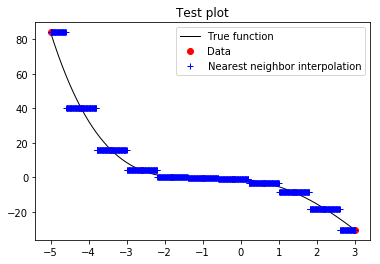

In [6]:
fig, ax = plt.subplots()

line1, = ax.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax.plot(x_grid, fx_Nearest, 'b+', label='Nearest neighbor interpolation')
ax.legend(loc='upper right')
ax.set_title('Test plot')

plt.show()


#### Linear interpolation

Linear interpolation is simple yet powerful method. It is also generalizable to multi-dimensional domain cases, and an interpolant is continuous. When the domain is one dimensional, the method preserves monotonicity and concavity/convexity of $f$. However, it doesn't necessarily preserve these properties in a high-dimensional case.

For each $x \in [x_0,x_{I}]$, the interpolant $\hat{f}$ is given by

$$ \hat{f}(x) = f(x_i)+\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}(x-x_i), \mbox{ if } x \in [x_i,x_{i+1}]. $$ 

The biggest challenge is to find an interval $[x_i,x_{t+1}]$ such that $x$ is contained in it. 

However, if the grid is equally-spaced, $i$ can be calculated by a floor division, int( (x-x[0]) // (x[1]-x[0]) ).

Or more generally, if the grid is an easily-invertible function of an equally-spaced grid, calculation is easy.


Let's write a function that takes data as input and returns the interpolant (which is a function)

In [7]:
def lininterp(x,y):
    # Linear interpolation given that x is an equally spaced grid
    def interpolant(z):
        
        i = int( (z-x[0]) // (x[1]-x[0]) )
        
        if i<len(x)-1:
            r = y[i] + (z-x[i])*(y[i+1]-y[i])/(x[i+1]-x[i])
        else:
            r = y[-1]
        
        return r
    
    return np.vectorize(interpolant)



Compute an interpolant and evaluate it on x_grid.

In [8]:
int_Linear = lininterp(x_data,fx_data)
fx_Linear = int_Linear(x_grid)

Plot the result:

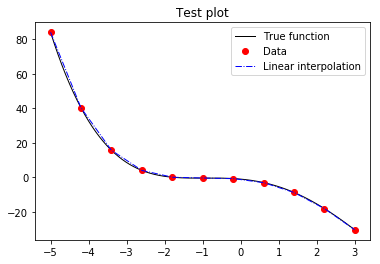

In [9]:
fig2, ax2 = plt.subplots()

line1, = ax2.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax2.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax2.plot(x_grid, fx_Linear, 'b-.', linewidth=1, label='Linear interpolation')
ax2.legend(loc='upper right')
ax2.set_title('Test plot')

plt.show()

Scipy.interpolate.interp1d() uses the linear interpolation as a default method (kind='linear'), and it permits not-equally-spaced grid.

#### Piecewise Hermite polynomial interpolation

We are not constrained to use only a linear function to interporate two data points.

Suppose we have not only the level information but also the derivative information at $x_0,...,x_I$. (The data set is called the _Hermite_ data.)

For any interval $[a,b]$, define four polynomials

\begin{eqnarray*}
\phi_1(x) &=& 1-3t^2+2t^3,\\
\phi_2(x) &=& (b-a)t(t-1)^2,\\
\phi_3(x) &=& t^2(3-2t),\\
\phi_4(x) &=& (b-a)t^2(t-1),\\
\end{eqnarray*}
where $t=(x-a)/(b-a)$. 

Then the polynomial

$$ p(x) = f(a)\phi_1(x) + f(b)\phi_3(x) +f'(a)\phi_2(x) + f'(b)\phi_4(x) $$

satisfies

$$ p(a)=f(a), p'(a)=f'(a), p(b)=f(b), p'(b) = f'(b).$$

The interpolant over $[x_0,x_I]$ is obtained by applying the above to $[a,b]=[x_i,x_{i+1}]$ for all $i$. Clearly, the interpolant is a cubic polynomial on each $(x_i,x_{t+1})$, and hence $C^1$ on the whole interval. 


#### Spline method

A widely used piecewise polynomial interpolation is one that uses _splines_. 

"A spline is any smooth function that is piecewise polynomial but also smooth where the polynomial pieces connect." (Judd, p.225.)

We say a function $s$ on  $[a,b]$ is a _spline of order $m$_ if
1. $s$ is $C^{m-2}$ on $[a,b]$, and
2. For all $[x_i,x_{i+1}]$, $s$ is a polynomial of degree $m-1$.


#### Cubic splines

The cubic spline is a spline of order 4 and thus it uses a cubic polynomial $a_i+b_i x+c_i x^2+d_i x^3$ on subinterval $i$, $[x_{i-1},x_i]$. 

Given the Lagrange data $\{(x_i,y_i)\}_{i=0}^n$, we have $n$ intervals, $n+1$ data points, and $4n$ unknowns. 

Naturally, we require the interpolating condition and continuity:

$$ y_i = a_i+b_i x_i+c_i x_i^2+d_i x_i^3, i=1,1,...,n; $$
$$ y_i = a_{i+1}+b_{i+1} x_i+c_{i+1} x_i^2+d_{i+1} x_i^3, i=0,1,...,n-1. $$

This gives us $2n$ conditions.

To assure that the interpolant is $C^{n-2}=C^2$, we need that the first and the second derivatives agree at the boundary of each subinterval:

$$ b_i + 2c_i x_i +3d_ix_i^2 = b_{i+1} + 2c_{i+1} x_i +3d_{i+1}x_i^2, i=1,...,n-1;$$

$$ 2c_i +6d_ix_i = 2c_{i+1} +6d_{i+1}x_i, i=1,...,n-1.$$

This gives us 2(n-1) conditions.

We need to have two more conditions. There are several ways to specify them. The following three are taken from Judd.

1. The natural spline: $s'(x_0)=s'(x_n)=0$;
2. The Hermite spline: $s'(x_0)=f'(x_0)$ and $s'(x_n)=f'(x_n)$;
3. The secant Hermite spline: $s'(x_0)=\frac{f(x_1)-f(x_0)}{x_1-x_0}$ and $s'(x_n)=\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}.$


Let's implement the natural spline using scipy.interpolate.CubicSpline().

In [10]:
int_Ncubic = interpolate.CubicSpline(x_data,fx_data,bc_type='clamped')

fx_Ncubic = int_Ncubic(x_grid)

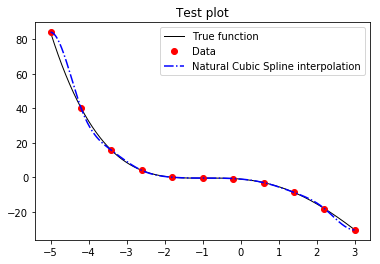

In [11]:
fig3, ax3 = plt.subplots()

line1, = ax3.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax3.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax3.plot(x_grid, fx_Ncubic, 'b-.', label='Natural Cubic Spline interpolation')
ax3.legend(loc='upper right')
ax3.set_title('Test plot')

plt.show()

#### Lagrange interpolation method

So far we have studied piecewise interpolation methods. 

There are interpolation methods that are not piecewise. One of them is the Lagrange interpolation method.

The Lagrange interpolation problem is to find a $n-1$ order polymonial to interpolate the Lagrange data with $n$ distinct points $\{(x_i,f(x_i))\}_{i=1}^n$. The existence and the uniqueness of its solution are proved (see Judd, Chapter 6). 

For $i=1,...,n$, define

$$l_i(x) : = \prod_{j\ne i}\frac{x-x_j}{x_i-x_j}.$$

Consider 

$$ p(x) = \sum_{i=1}^n f(x_i) l_i(x). $$

Evaluation based on this formula is, however, expensive. Judd recommends to use symbolic math softwafe to obtain an expression of the form:

$$ p(x) = \sum_{i=0}^{n-1} a_i x^i. $$

(For Python, SymPy <http://docs.sympy.org/latest/index.html> is a library for symbolic math.)

Theoretically, one can reformulate the Lagrange interpolation problem as a linear equation solving one:

\begin{equation}
\left[\begin{array}{ccccc}
1 &x_1 &x_1^2 &\cdots &x_1^{n-1} \\
1 &x_2 &x_2^2 &\cdots &x_2^{n-1} \\
 & & \vdots & & \\
1 &x_n &x_n^2 &\cdots &x_n^{n-1} \\
\end{array}\right] \left[\begin{array}{c} a_0 \\a_1 \\ \vdots \\ a_{n-1}\end{array}\right] = \left[\begin{array}{c} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n)\end{array}\right]
\end{equation}

This expression is used to prove the uniqueness of the solution, but in practice the left-most matrix (the _Vandermonde matrix_ <https://en.wikipedia.org/wiki/Vandermonde_matrix>) generally has a large condition number, making it hard to solve this linear equation _accurately on a computer_.

But let's try anyway, to solve the problem by solving the above linear system of equations.

In [12]:
def laginterp(x,y):
    
    # return polynomial 
    
    x0, y0 = x[:],y[:]
    
    n = len(x)
    np.reshape(x0, (n,1))
    np.reshape(y0, (n,1))
    
    Vmat = np.ones((n,n))
    for i in range(1,n):
        Vmat[:,i] = x0**i
        
    a = np.linalg.solve(Vmat,y0)
        
    return np.poly1d(a[::-1])

In [13]:
int_Lag = laginterp(x_data,fx_data)
fx_Lag = int_Lag(x_grid)

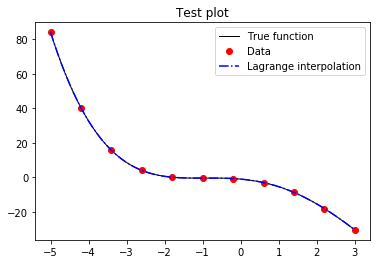

In [14]:
fig4, ax4 = plt.subplots()

line1, = ax4.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax4.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax4.plot(x_grid, fx_Lag, 'b-.', label='Lagrange interpolation')
ax4.legend(loc='upper right')
ax4.set_title('Test plot')

plt.show()

**IN-CLASS EXERCISE**

At each point $x$ in $x_{grid}$, we can evaluate an error of interpolation by calculating the difference between the true function and the interpolant at $x$. (You don't need to calculate the absolute error.)

Compute and plot the error for the nearest-neighbor, linear, (natural) cubic spline, and the Lagrange interpolations.


#### Runge's phenomenon and optimal choice of nodes

The test function we have used is a polynomial, and hence the polynomial interpolation is expected to work well. 

Let's consider instead

$$f(x) = 1/(1+x^2)$$

over $[-5,5]$.

In [15]:
# Example taken from Judd (p.219)

testf = lambda x: 1.0/(1.0+x**2)

testf_der = lambda x: -(2*x)/((1.0+x**2)**2)
testfv = np.vectorize(testf)
testf_derv = np.vectorize(testf_der)

xlb = -5.0
xub = 5.0

x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = testfv(x_grid)

step_data = (xub-xlb)/10
x_data = np.array([xlb+i*step_data for i in range(11)])
fx_data = testfv(x_data)

In [16]:
# three interpolation methods

int_Linear = lininterp(x_data,fx_data)
fx_Linear = int_Linear(x_grid)

int_Ncubic = interpolate.CubicSpline(x_data,fx_data,bc_type='natural')
fx_Ncubic = int_Ncubic(x_grid)

int_Lag = laginterp(x_data,fx_data)
fx_Lag = int_Lag(x_grid)



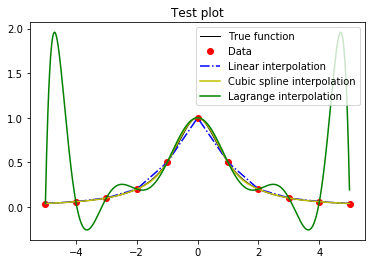

In [17]:
fig5, ax5 = plt.subplots()

line1, = ax5.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax5.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax5.plot(x_grid, fx_Linear, 'b-.', label='Linear interpolation')
line4, = ax5.plot(x_grid, fx_Ncubic, 'y-', label='Cubic spline interpolation')
line5, = ax5.plot(x_grid, fx_Lag, 'g-', label='Lagrange interpolation')
ax5.legend(loc='upper right')
ax5.set_title('Test plot')

plt.show()

As we can see, the Lagrange interpolation method yields an interpolant that does a very poor job in approximating the original function.

This is called the Runge's phenomenon <https://en.wikipedia.org/wiki/Runge%27s_phenomenon> and is an implication of using a high order polynomial and equidistant points.

By definition, the Lagrange interpolation must set the order of a polynomial to the same number as the data points. Then the question is, can we do something to the way we choose the grid point?


#### Chevyshev interpolation nodes

For $f:[-1,1] \rightarrow \mathbb{R}$, choosing the nodes $\{x_k\}_{k=0}^n$ so that

$$ x_k = \cos \left(\frac{2k-1}{2n}\pi\right)$$

_minimizes the error of the Lagrange interpolation_ in a certain sense. (See Judd for more details.)

For general $f:[\underline{x},\overline{x}]$, we change varaibles so that

$$ x_k = \underline{x} + \frac{(\overline{x}-\underline{x})}{2}(\cos \left(\frac{2k-1}{2n}\pi\right)+1). $$



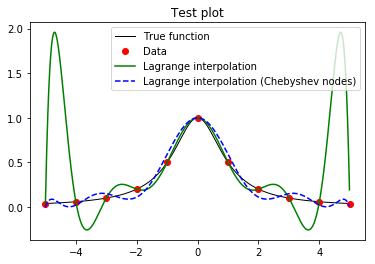

In [18]:
x_data_new = np.empty_like(x_data)
n = len(x_data_new)
for i in range(n):
    x_data_new[i] = xlb + (xub-xlb)/2*(np.cos((2*(i+1)-1)*np.pi/(2*n))+1.0)

fx_data_new = testfv(x_data_new)

int_Lag_new = laginterp(x_data_new,fx_data_new)
fx_Lag_new = int_Lag_new(x_grid)


fig5, ax5 = plt.subplots()

line1, = ax5.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax5.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line5, = ax5.plot(x_grid, fx_Lag, 'g-', label='Lagrange interpolation')
line6, = ax5.plot(x_grid, fx_Lag_new, 'b--', label='Lagrange interpolation (Chebyshev nodes)')
ax5.legend(loc='upper right')
ax5.set_title('Test plot')

plt.show()

**QUIZ**

1. In-class exercise above.
2. Implement the piecewise Hermite polynomial interpolation. Check whether the Runge phenomenon occurs for an equally spaced grid and for the Chebyshev nodes. 
3. How can we implement the Hermite spline (when we have derivative data) and the secant Hermite spline, using scipy.interpolate.CubicSpline()? Hint: read what the keyword argument bc_type does in <https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline>.